Country Level Analysis

0. Importing Packages and Data

In [507]:
#Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [508]:
#Importing the data

excel_files = [
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Perdidas por Robo, Vandalismo, Asalto e Indendios Premeditados - World Bank.xls",
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Tasa tributaria total porcentage de utilidades comerciales.xls",
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Tipos de Interes Real.xls",
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Valor perdido por cortes electricos - World Bank.xls",
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Densidad de nuevas empresas cada 1000 habitantes entre 15 y 64 anos - World Bank.xls",
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Impuesto sobre utilidades porcentaje utilidades comerciales.xls",
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Impuestos laborales y contribuciones porcentaje de las ganancias comerciales.xls",
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Inflacion Anual.xls",
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Inversion Extrangera Neta - World Bank.xls",
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Nuevas Empresas Creadas - Banco Mundial.xls",
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Numero de dias necesarios para registrar una propiedad - World Bank.xls",
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Numero de impuestos.xls",
    "C:/Users/usuario/OneDrive/Escritorio/TFG/Country level/Otros impuestos que pagan las empresas.xls"
]

df_names = [
    "losses_by_vandalism",
    "total_tax_rate_percentage_commercial_utilities",
    "real_interest_rate",
    "value_lost_by_power_cuts",
    "density_of_new_companies_per_1000_inhabitants",
    "tax_on_profit_percentage_commercial_utilities",
    "labor_taxes_and_contributions_percentage_commercial_gains",
    "annual_inflation",
    "net_foreign_investment",
    "new_companies_created",
    "number_of_days_needed_to_register_a_property",
    "number_of_taxes",
    "other_taxes_paid_by_companies"
]

for file, name in zip(excel_files, df_names):
    globals()[name] = pd.read_excel(file)

1. Data manipulation & cleaning

1.1. Merging the Data and Setting Dtypes

In [509]:
#Unpivotting tables

for name in df_names:
    globals()[name] = pd.melt(
        globals()[name],
        id_vars=["Country Name"],
        var_name="Year",
        value_name=name
    )

In [510]:
#Merging tables

df = losses_by_vandalism.merge(
    total_tax_rate_percentage_commercial_utilities,
    on=["Country Name", "Year"],
    how="outer"
).merge(
    real_interest_rate,
    on=["Country Name", "Year"],
    how="outer"
).merge(
    value_lost_by_power_cuts,
    on=["Country Name", "Year"],
    how="outer"
).merge(
    density_of_new_companies_per_1000_inhabitants,
    on=["Country Name", "Year"],
    how="outer"
).merge(
    tax_on_profit_percentage_commercial_utilities,
    on=["Country Name", "Year"],
    how="outer"
).merge(
    labor_taxes_and_contributions_percentage_commercial_gains,
    on=["Country Name", "Year"],
    how="outer"
).merge(
    annual_inflation,
    on=["Country Name", "Year"],
    how="outer"
).merge(
    net_foreign_investment,
    on=["Country Name", "Year"],
    how="outer"
).merge(
    new_companies_created,
    on=["Country Name", "Year"],
    how="outer"
).merge(
    number_of_days_needed_to_register_a_property,
    on=["Country Name", "Year"],
    how="outer"
).merge(
    number_of_taxes,
    on=["Country Name", "Year"],
    how="outer"
).merge(
    other_taxes_paid_by_companies,
    on=["Country Name", "Year"],
    how="outer"
)

In [511]:
#Filtering for countries and excluding regions

filtered_list = [
    'Afganistán', 'Albania', 'Alemania', 'Andorra', 'Angola', 'Antigua y Barbuda', 'Arabia Saudita', 'Argelia',
    'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaiyán', 'Bahamas', 'Bahrein', 'Bangladesh', 'Barbados',
    'Belarús', 'Belice', 'Benin', 'Bermudas', 'Bhután', 'Bolivia', 'Bosnia y Herzegovina', 'Botswana', 'Brasil', 'Brunei Darussalam',
    'Bulgaria', 'Burkina Faso', 'Burundi', 'Bélgica', 'Cabo Verde', 'Camboya', 'Camerún', 'Canadá', 'Chad', 'Chile', 'China', 'Chipre',
    'Colombia', 'Comoras', 'Congo, República Democrática del', 'Congo, República del', 'Corea, República Popular Democrática de',
    'Corea, República de', 'Costa Rica', 'Croacia', 'Cuba', 'Curacao', "Côte d'Ivoire", 'Dinamarca', 'Djibouti', 'Dominica', 'Ecuador',
    'Egipto, República Árabe de', 'El Salvador', 'Emiratos Árabes Unidos', 'Eritrea', 'Eslovenia', 'España', 'Estados Unidos',
    'Estados pequeos de las Islas del Pacfico', 'Estados pequeos del Caribe', 'Estonia', 'Eswatini', 'Etiopía', 'Federación de Rusia',
    'Fiji', 'Filipinas', 'Finlandia', 'Francia', 'Gabón', 'Gambia', 'Georgia', 'Ghana', 'Gibraltar', 'Granada', 'Grecia', 'Groenlandia',
    'Guam', 'Guatemala', 'Guinea', 'Guinea Ecuatorial', 'Guinea-Bissau', 'Guyana', 'Haití', 'Honduras',
    'Hong Kong, Región Administrativa Especial', 'Hungría', 'India', 'Indonesia', 'Iraq', 'Irlanda', 'Irán, República Islámica del',
    'Isla de Man', 'Isla de San Martín (parte francesa)', 'Islandia', 'Islas Caimán', 'Islas Feroe', 'Islas Marshall', 'Islas Salomón',
    'Islas Turcas y Caicos', 'Islas Vírgenes (EE.UU.)', 'Islas Vírgenes Británicas', 'Islas del Canal', 'Israel', 'Italia', 'Jamaica',
    'Japón', 'Jordania', 'Kazajstán', 'Kenya', 'Kirguistán', 'Kiribati', 'Kosovo', 'Kuwait', 'Lesotho', 'Letonia', 'Liberia', 'Libia',
    'Liechtenstein', 'Lituania', 'Luxemburgo', 'Líbano', 'Macedonia del Norte', 'Madagascar', 'Malasia', 'Malawi', 'Maldivas', 'Malta',
    'Malí', 'Mariana', 'Marruecos', 'Mauricio', 'Mauritania', 'Micronesia (Estados Federados de)', 'Mongolia', 'Montenegro', 'Mozambique',
    'Myanmar', 'México', 'Mónaco', 'Namibia', 'Nauru', 'Nepal', 'Nicaragua', 'Nigeria', 'Noruega', 'Nueva Caledonia',
    'Nueva Zelandia', 'Níger', 'Omán', 'Otros Estados pequeos', 'Pakistán', 'Palau', 'Panamá', 'Papua Nueva Guinea', 'Paraguay',
    'Países Bajos', 'Pequeños Estados', 'Perú', 'Polinesia Francesa', 'Polonia', 'Portugal', 'Puerto Rico', 'Qatar',
    'Región Administrativa Especial de Macao, China', 'Reino Unido', 'República Centroafricana', 'República Checa',
    'República Democrática Popular Lao', 'República Dominicana', 'República Eslovaca', 'República de Moldova',
    'República Árabe Siria', 'Ribera Occidental y Gaza', 'Rumania', 'Rwanda', 'Saint Kitts y Nevis', 'Samoa',
    'Samoa Americana', 'San Marino', 'San Vicente y las Granadinas', 'Santa Lucía', 'Santo Tomé y Príncipe',
    'Senegal', 'Serbia', 'Seychelles', 'Sierra Leona', 'Singapur', 'Sint Maarten (Dutch part)', 'Somalia', 'Sri Lanka', 'Sudáfrica',
    'Sudán', 'Sudán del Sur', 'Suecia', 'Suiza', 'Suriname', 'Tailandia', 'Tanzanía', 'Tayikistán', 'Timor-Leste', 'Togo',
    'Tonga', 'Trinidad y Tobago', 'Turkmenistán', 'Turquía', 'Tuvalu', 'Túnez', 'Ucrania', 'Uganda', 'Uruguay',
    'Uzbekistán', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen, Rep. del', 'Zambia', 'Zimbabwe'
]

df = df[df['Country Name'].isin(filtered_list)]

In [512]:
#Making some final adjustments

df = df[df['Year'] >= '2005']
df.set_index('Year', inplace=True)
df.index = pd.to_datetime(df.index, format='%Y')

In [513]:
#Setting Dtypes

col_list = df.columns.tolist()

data_types_dict = {
    'Country Name': 'category',
 'losses_by_vandalism': 'float64',
 'total_tax_rate_percentage_commercial_utilities': 'float64',
 'real_interest_rate': 'float64',
 'value_lost_by_power_cuts': 'float64',
 'density_of_new_companies_per_1000_inhabitants': 'float64',
 'tax_on_profit_percentage_commercial_utilities': 'float64',
 'labor_taxes_and_contributions_percentage_commercial_gains': 'float64',
 'annual_inflation': 'float64',
 'net_foreign_investment': 'float64',
 'new_companies_created': 'float64',
 'number_of_days_needed_to_register_a_property': 'float64',
 'number_of_taxes': 'float64',
 'other_taxes_paid_by_companies': 'float64'
}

df = df.astype(data_types_dict)

1.2. Handling Missing Values

In [514]:
print('\n                                       NaN Summary Raw\n')
print('----------------------------------------------------------------------------------------- \n')
df.info()
print('\n----------------------------------------------------------------------------------------- \n')
print('\n          Own autorship. Table displaying the list of non-null values in the data. \n    ')


                                       NaN Summary Raw

----------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4199 entries, 2005-01-01 to 2023-01-01
Data columns (total 14 columns):
 #   Column                                                     Non-Null Count  Dtype   
---  ------                                                     --------------  -----   
 0   Country Name                                               4199 non-null   category
 1   losses_by_vandalism                                        309 non-null    float64 
 2   total_tax_rate_percentage_commercial_utilities             2737 non-null   float64 
 3   real_interest_rate                                         2405 non-null   float64 
 4   value_lost_by_power_cuts                                   313 non-null    float64 
 5   density_of_new_companies_per_1000_inhabitants              2415 non-null   float64 
 6   tax_on_pr

In [515]:
# Interpolating with the time method in both directions.

# Columns to interpolate (all columns except 'Country Name')
cols_to_interpolate = df.columns[1:].tolist()

# Sorting by Index (Year) Group by 'Country Name' and interpolate each group

df.sort_index(inplace=True)

df[cols_to_interpolate] = df.groupby('Country Name')[cols_to_interpolate].transform(
    lambda x: x.interpolate(method='time', limit_direction='both')
)

# Reset index to avoid alignment issues
df = df.reset_index(drop=False)

C:\Users\usuario\AppData\Local\Temp\ipykernel_17624\37959075.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[cols_to_interpolate] = df.groupby('Country Name')[cols_to_interpolate].transform(


In [516]:
print('\n                             NaN Summary After Interpolation \n')
print('----------------------------------------------------------------------------------------- \n')
df.info()
print('----------------------------------------------------------------------------------------- \n')
print('\n          Own autorship. Table displaying the list of non-null values in the data. \n                        Table generated using python (pandas).')


                             NaN Summary After Interpolation 

----------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 15 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   Year                                                       4199 non-null   datetime64[ns]
 1   Country Name                                               4199 non-null   category      
 2   losses_by_vandalism                                        2983 non-null   float64       
 3   total_tax_rate_percentage_commercial_utilities             3667 non-null   float64       
 4   real_interest_rate                                         2774 non-null   float64       
 5   value_lost_by_power_cuts                                   2945 non

In [517]:
# Fill with group mean, fallback to global mean
for col in cols_to_interpolate:
    df[col] = df.groupby('Country Name')[col].transform(lambda x: x.fillna(x.mean()))

C:\Users\usuario\AppData\Local\Temp\ipykernel_17624\3046029720.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[col] = df.groupby('Country Name')[col].transform(lambda x: x.fillna(x.mean()))


In [518]:
print('\n                 NaN Summary After Interpolation and Filling with Mean \n')
print('----------------------------------------------------------------------------------------- \n')
df.info()
print('----------------------------------------------------------------------------------------- \n')
print('\n          Own autorship. Table displaying the list of non-null values in the data. \n                        Table generated using python (pandas).')


                 NaN Summary After Interpolation and Filling with Mean 

----------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 15 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   Year                                                       4199 non-null   datetime64[ns]
 1   Country Name                                               4199 non-null   category      
 2   losses_by_vandalism                                        2983 non-null   float64       
 3   total_tax_rate_percentage_commercial_utilities             3667 non-null   float64       
 4   real_interest_rate                                         2774 non-null   float64       
 5   value_lost_by_power_cuts                                 

In [519]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,4199,2013-12-31 21:28:25.263158016,2005-01-01 00:00:00,2009-01-01 00:00:00,2014-01-01 00:00:00,2019-01-01 00:00:00,2023-01-01 00:00:00,NaN
losses_by_vandalism,2983.0,5.2431,0.5,1.94144,3.6,6.8,61.9,6.004364
total_tax_rate_percentage_commercial_utilities,3667.0,43.502878,7.4,30.8,38.7,48.8,339.1,30.320816
real_interest_rate,2774.0,5.206108,-81.132121,1.4776,4.836959,8.854408,61.882604,9.662595
value_lost_by_power_cuts,2945.0,4.105026,0.0,0.8,2.342706,5.5,33.8,4.75369
density_of_new_companies_per_1000_inhabitants,3363.0,4.722864,0.006698,0.442282,1.523667,3.909431,377.816705,20.560284
tax_on_profit_percentage_commercial_utilities,3667.0,16.556377,-0.2,9.4,17.2,23.0,65.9,10.064447
labor_taxes_and_contributions_percentage_commercial_gains,3667.0,16.132076,0.0,8.2,13.5,23.05,54.0,11.047715
annual_inflation,4123.0,6.798727,-28.760135,1.411931,3.602985,7.736885,921.535652,22.584965
net_foreign_investment,3762.0,7.35453,-1303.108267,1.067629,2.812963,6.137138,1509.002098,76.773609


2. Exploratory Data Analysis

2.1. Removing outliers from df

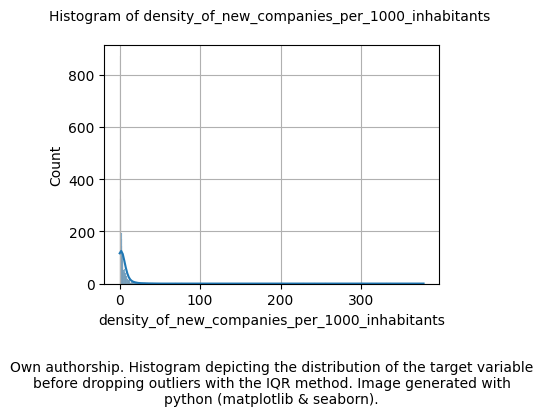

In [520]:
cols_to_remove_outliers = ['density_of_new_companies_per_1000_inhabitants']

plt.figure(figsize=(5, 5))
# Assign the plot to 'ax' when creating it
ax = sns.histplot(df['density_of_new_companies_per_1000_inhabitants'], kde=True)
# Fixed the f-string syntax (removed curly braces since we're not inserting variables)
plt.title('Histogram of density_of_new_companies_per_1000_inhabitants \n', fontsize=10)

# Now we can use ax.transAxes since 'ax' exists
plt.text(0.5, -0.5, 
         'Own authorship. Histogram depicting the distribution of the target variable\n'
         'before dropping outliers with the IQR method. Image generated with\n'
         'python (matplotlib & seaborn).',
         ha='center',
         transform=ax.transAxes,
         fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()

In [521]:
# Removing outliers
for column in cols_to_remove_outliers: 
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]

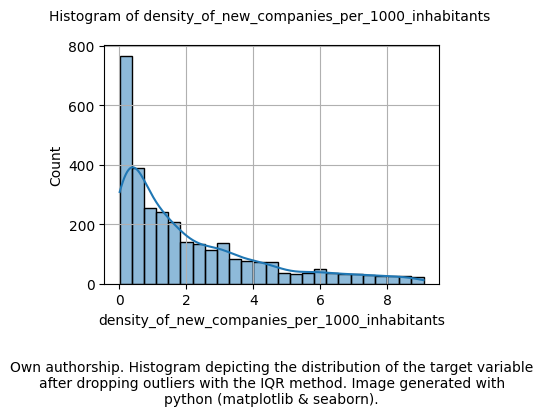

In [522]:
plt.figure(figsize=(5, 5))
# Assign the plot to 'ax' when creating it
ax = sns.histplot(df['density_of_new_companies_per_1000_inhabitants'], kde=True)
# Fixed the f-string syntax (removed curly braces since we're not inserting variables)
plt.title('Histogram of density_of_new_companies_per_1000_inhabitants \n', fontsize=10)

# Now we can use ax.transAxes since 'ax' exists
plt.text(0.5, -0.5, 
         'Own authorship. Histogram depicting the distribution of the target variable\n'
         'after dropping outliers with the IQR method. Image generated with\n'
         'python (matplotlib & seaborn).',
         ha='center',
         transform=ax.transAxes,
         fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()

In [523]:
#Viewing variations in the descriptive statistics after removing outliers

df.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,3068,2013-12-02 20:18:27.692307712,2005-01-01 00:00:00,2009-01-01 00:00:00,2014-01-01 00:00:00,2019-01-01 00:00:00,2023-01-01 00:00:00,NaN
losses_by_vandalism,2588.0,5.346679,0.5,1.9,3.6,6.9,61.9,6.331527
total_tax_rate_percentage_commercial_utilities,3030.0,42.88176,7.4,31.0,38.659091,48.9,339.1,28.015056
real_interest_rate,2321.0,5.562354,-81.132121,1.723513,5.345758,9.359386,61.882604,10.036038
value_lost_by_power_cuts,2553.0,4.017893,0.0,0.8,2.3,5.4,33.8,4.727842
density_of_new_companies_per_1000_inhabitants,3068.0,2.046846,0.006698,0.373192,1.257219,3.058408,9.08462,2.152671
tax_on_profit_percentage_commercial_utilities,3030.0,16.174712,-0.2,9.5,17.2,22.8,58.9,9.367225
labor_taxes_and_contributions_percentage_commercial_gains,3030.0,16.488112,0.0,8.025,13.5,23.675,54.0,11.429769
annual_inflation,3068.0,6.715047,-28.760135,1.507033,3.932214,8.103493,921.535652,23.20824
net_foreign_investment,2992.0,6.557314,-1303.108267,1.12973,2.850895,5.913917,1282.607229,57.673182


In [524]:
print('\n        NaN Summary After Interpolation, Filling with Mean and Outlier Removal \n')
print('----------------------------------------------------------------------------------------- \n')
df.info()
print('----------------------------------------------------------------------------------------- \n')
print('\n          Own autorship. Table displaying the list of non-null values in the data. \n                        Table generated using python (pandas).')


        NaN Summary After Interpolation, Filling with Mean and Outlier Removal 

----------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
Index: 3068 entries, 0 to 4198
Data columns (total 15 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   Year                                                       3068 non-null   datetime64[ns]
 1   Country Name                                               3068 non-null   category      
 2   losses_by_vandalism                                        2588 non-null   float64       
 3   total_tax_rate_percentage_commercial_utilities             3030 non-null   float64       
 4   real_interest_rate                                         2321 non-null   float64       
 5   value_lost_by_power_cuts                              

2.3. Making last adjustments and adding more variables for context

In [525]:
#Adding continent variables

# Dictionary mapping countries to continents
country_to_continent = {
    'Afganistán': 'Asia', 'Albania': 'Europe', 'Alemania': 'Europe', 'Andorra': 'Europe', 'Angola': 'Africa',
    'Antigua y Barbuda': 'America', 'Arabia Saudita': 'Asia', 'Argelia': 'Africa', 'Argentina': 'America',
    'Armenia': 'Asia', 'Aruba': 'America', 'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaiyán': 'Asia',
    'Bahamas': 'America', 'Bahrein': 'Asia', 'Bangladesh': 'Asia', 'Barbados': 'America', 'Belarús': 'Europe',
    'Belice': 'America', 'Benin': 'Africa', 'Bermudas': 'America', 'Bhután': 'Asia', 'Bolivia': 'America',
    'Bosnia y Herzegovina': 'Europe', 'Botswana': 'Africa', 'Brasil': 'America', 'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Bélgica': 'Europe', 'Cabo Verde': 'Africa',
    'Camboya': 'Asia', 'Camerún': 'Africa', 'Canadá': 'America', 'Chad': 'Africa', 'Chile': 'America',
    'China': 'Asia', 'Chipre': 'Asia', 'Colombia': 'America', 'Comoras': 'Africa', 'Congo, República Democrática del': 'Africa',
    'Congo, República del': 'Africa', 'Corea, República Popular Democrática de': 'Asia', 'Corea, República de': 'Asia',
    'Costa Rica': 'America', 'Croacia': 'Europe', 'Cuba': 'America', 'Curacao': 'America', "Côte d'Ivoire": 'Africa',
    'Dinamarca': 'Europe', 'Djibouti': 'Africa', 'Dominica': 'America', 'Ecuador': 'America', 'Egipto, República Árabe de': 'Africa',
    'El Salvador': 'America', 'Emiratos Árabes Unidos': 'Asia', 'Eritrea': 'Africa', 'Eslovenia': 'Europe', 'España': 'Europe',
    'Estados Unidos': 'America', 'Estados pequeos de las Islas del Pacfico': 'Oceania', 'Estados pequeos del Caribe': 'America',
    'Estonia': 'Europe', 'Eswatini': 'Africa', 'Etiopía': 'Africa', 'Federación de Rusia': 'Asia', 'Fiji': 'Oceania',
    'Filipinas': 'Asia', 'Finlandia': 'Europe', 'Francia': 'Europe', 'Gabón': 'Africa', 'Gambia': 'Africa', 'Georgia': 'Asia',
    'Ghana': 'Africa', 'Gibraltar': 'Europe', 'Granada': 'America', 'Grecia': 'Europe', 'Groenlandia': 'America',
    'Guam': 'Oceania', 'Guatemala': 'America', 'Guinea': 'Africa', 'Guinea Ecuatorial': 'Africa', 'Guinea-Bissau': 'Africa',
    'Guyana': 'America', 'Haití': 'America', 'Honduras': 'America', 'Hong Kong, Región Administrativa Especial': 'Asia',
    'Hungría': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia', 'Iraq': 'Asia', 'Irlanda': 'Europe', 'Irán, República Islámica del': 'Asia',
    'Isla de Man': 'Europe', 'Isla de San Martín (parte francesa)': 'America', 'Islandia': 'Europe', 'Islas Caimán': 'America',
    'Islas Feroe': 'Europe', 'Islas Marshall': 'Oceania', 'Islas Salomón': 'Oceania', 'Islas Turcas y Caicos': 'America',
    'Islas Vírgenes (EE.UU.)': 'America', 'Islas Vírgenes Británicas': 'America', 'Islas del Canal': 'Europe', 'Israel': 'Asia',
    'Italia': 'Europe', 'Jamaica': 'America', 'Japón': 'Asia', 'Jordania': 'Asia', 'Kazajstán': 'Asia', 'Kenya': 'Africa',
    'Kirguistán': 'Asia', 'Kiribati': 'Oceania', 'Kosovo': 'Europe', 'Kuwait': 'Asia', 'Lesotho': 'Africa', 'Letonia': 'Europe',
    'Liberia': 'Africa', 'Libia': 'Africa', 'Liechtenstein': 'Europe', 'Lituania': 'Europe', 'Luxemburgo': 'Europe', 'Líbano': 'Asia',
    'Macedonia del Norte': 'Europe', 'Madagascar': 'Africa', 'Malasia': 'Asia', 'Malawi': 'Africa', 'Maldivas': 'Asia', 'Malta': 'Europe',
    'Malí': 'Africa', 'Mariana': 'Oceania', 'Marruecos': 'Africa', 'Mauricio': 'Africa', 'Mauritania': 'Africa', 'Micronesia (Estados Federados de)': 'Oceania',
    'Mongolia': 'Asia', 'Montenegro': 'Europe', 'Mozambique': 'Africa', 'Myanmar': 'Asia', 'México': 'America', 'Mónaco': 'Europe',
    'Namibia': 'Africa', 'Nauru': 'Oceania', 'Nepal': 'Asia', 'Nicaragua': 'America', 'Nigeria': 'Africa', 'Noruega': 'Europe',
    'Nueva Caledonia': 'Oceania', 'Nueva Zelandia': 'Oceania', 'Níger': 'Africa', 'Omán': 'Asia', 'Otros Estados pequeos': 'Oceania',
    'Pakistán': 'Asia', 'Palau': 'Oceania', 'Panamá': 'America', 'Papua Nueva Guinea': 'Oceania', 'Paraguay': 'America',
    'Países Bajos': 'Europe', 'Pequeños Estados': 'Oceania', 'Perú': 'America', 'Polinesia Francesa': 'Oceania', 'Polonia': 'Europe',
    'Portugal': 'Europe', 'Puerto Rico': 'America', 'Qatar': 'Asia', 'Región Administrativa Especial de Macao, China': 'Asia',
    'Reino Unido': 'Europe', 'República Centroafricana': 'Africa', 'República Checa': 'Europe', 'República Democrática Popular Lao': 'Asia',
    'República Dominicana': 'America', 'República Eslovaca': 'Europe', 'República de Moldova': 'Europe', 'República Árabe Siria': 'Asia',
    'Ribera Occidental y Gaza': 'Asia', 'Rumania': 'Europe', 'Rwanda': 'Africa', 'Saint Kitts y Nevis': 'America', 'Samoa': 'Oceania',
    'Samoa Americana': 'Oceania', 'San Marino': 'Europe', 'San Vicente y las Granadinas': 'America', 'Santa Lucía': 'America',
    'Santo Tomé y Príncipe': 'Africa', 'Senegal': 'Africa', 'Serbia': 'Europe', 'Seychelles': 'Africa', 'Sierra Leona': 'Africa',
    'Singapur': 'Asia', 'Sint Maarten (Dutch part)': 'America', 'Somalia': 'Africa', 'Sri Lanka': 'Asia', 'Sudáfrica': 'Africa',
    'Sudán': 'Africa', 'Sudán del Sur': 'Africa', 'Suecia': 'Europe', 'Suiza': 'Europe', 'Suriname': 'America', 'Tailandia': 'Asia',
    'Tanzanía': 'Africa', 'Tayikistán': 'Asia', 'Timor-Leste': 'Asia', 'Togo': 'Africa', 'Tonga': 'Oceania', 'Trinidad y Tobago': 'America',
    'Turkmenistán': 'Asia', 'Turquía': 'Asia', 'Tuvalu': 'Oceania', 'Túnez': 'Africa', 'Ucrania': 'Europe', 'Uganda': 'Africa',
    'Uruguay': 'America', 'Uzbekistán': 'Asia', 'Vanuatu': 'Oceania', 'Venezuela': 'America', 'Viet Nam': 'Asia',
    'Yemen, Rep. del': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

# Adding the 'Continent' column
df['Continent'] = df['Country Name'].map(country_to_continent)
df['Continent'] = df['Continent'].astype('category')

#Getting dummies for the continent column
df = pd.get_dummies(df, columns=['Continent'], drop_first=True, prefix='')

continent_list = ['_America',	'_Asia',	'_Europe',	'_Oceania']

for continent in continent_list:
    df[continent] = df[continent].astype('int')

In [526]:
#Making the year variable an interger
df['Year'] = df['Year'].dt.year

In [527]:
#Adding an economic crisis column

crisis_dict = {
    # Global shocks
    2007: 'global',   # Start of Global Financial Crisis :contentReference[oaicite:0]{index=0}
    2008: 'global',   # Peak of Global Financial Crisis :contentReference[oaicite:1]{index=1}
    2009: 'global',   # Tail of Global Financial Crisis :contentReference[oaicite:2]{index=2}
    2020: 'global',   # COVID‑19 economic shock and stock‑market crash :contentReference[oaicite:3]{index=3}

    # European sovereign‑debt and banking crises
    2009: ['Grecia', 'Irlanda', 'Portugal', 'España', 'Italia', 'Chipre'],   # European debt crisis :contentReference[oaicite:4]{index=4}
    2010: ['Grecia', 'Irlanda', 'Portugal', 'España', 'Italia', 'Chipre'],   # Continued debt crisis :contentReference[oaicite:5]{index=5}
    2011: ['Islandia', 'España', 'Grecia'],                                 # Icelandic (2008–11) & Greek (2010–18) crises :contentReference[oaicite:6]{index=6}
    2012: ['España', 'Grecia'],                                             # Spanish program ends 2014, Greek debt program ongoing :contentReference[oaicite:7]{index=7}
    2013: [],                                                               # No major new European program crises
    2014: ['España', 'Grecia'],                                             # Spanish crisis ends, Greek adjustment continues :contentReference[oaicite:8]{index=8}

    # Emerging‑market and commodity‑exporter crises
    2013: ['Venezuela'],                                                     # Venezuelan economic collapse begins :contentReference[oaicite:9]{index=9}
    2014: ['Brasil', 'Federación de Rusia', 'Venezuela'],                    # Brazil (2014–16), Russia (2014–16), Venezuela ongoing :contentReference[oaicite:10]{index=10}
    2015: ['Brasil', 'Federación de Rusia'],                                 # Brazil & Russia :contentReference[oaicite:11]{index=11}
    2016: ['Brasil', 'Federación de Rusia'],                                 # Brazil & Russia :contentReference[oaicite:12]{index=12}

    # Latin American currency/debt crises
    2018: ['Argentina', 'Turquía'],                                          # Argentina IMF/SBA crisis begins; Turkey crisis starts :contentReference[oaicite:13]{index=13}
    2019: ['Sri Lanka'],                                                      # Sri Lankan sovereign/debt implosion begins :contentReference[oaicite:14]{index=14}

    # Late‑stage emerging/development crises
    2022: ['Pakistán', 'Federación de Rusia'],                               # Pakistan (2022–present), Russia sanctions crisis :contentReference[oaicite:15]{index=15}
    2023: ['Pakistán', 'Federación de Rusia'],                               # Continued Pakistan & Russia crises :contentReference[oaicite:16]{index=16}
}

# Adding an economic crisis column

def crisis_indicator(row):
    year = row['Year']
    country = row['Country Name']
    crisis_countries = crisis_dict.get(year, [])
    
    if crisis_countries == 'global':
        return 1
    return 1 if country in crisis_countries else 0

df['crisis'] = df.apply(crisis_indicator, axis=1)


2.4. Creating a Standarized df

In [528]:
# Creating a copy of the df
df_standardized = df.copy()

# Standarizing the columns
for column in cols_to_interpolate:
    df_standardized[column] = (df_standardized[column] - df_standardized[column].mean()) / df_standardized[column].std()

3. Exploratory Data Analysis

3.1. Correlation Analysis

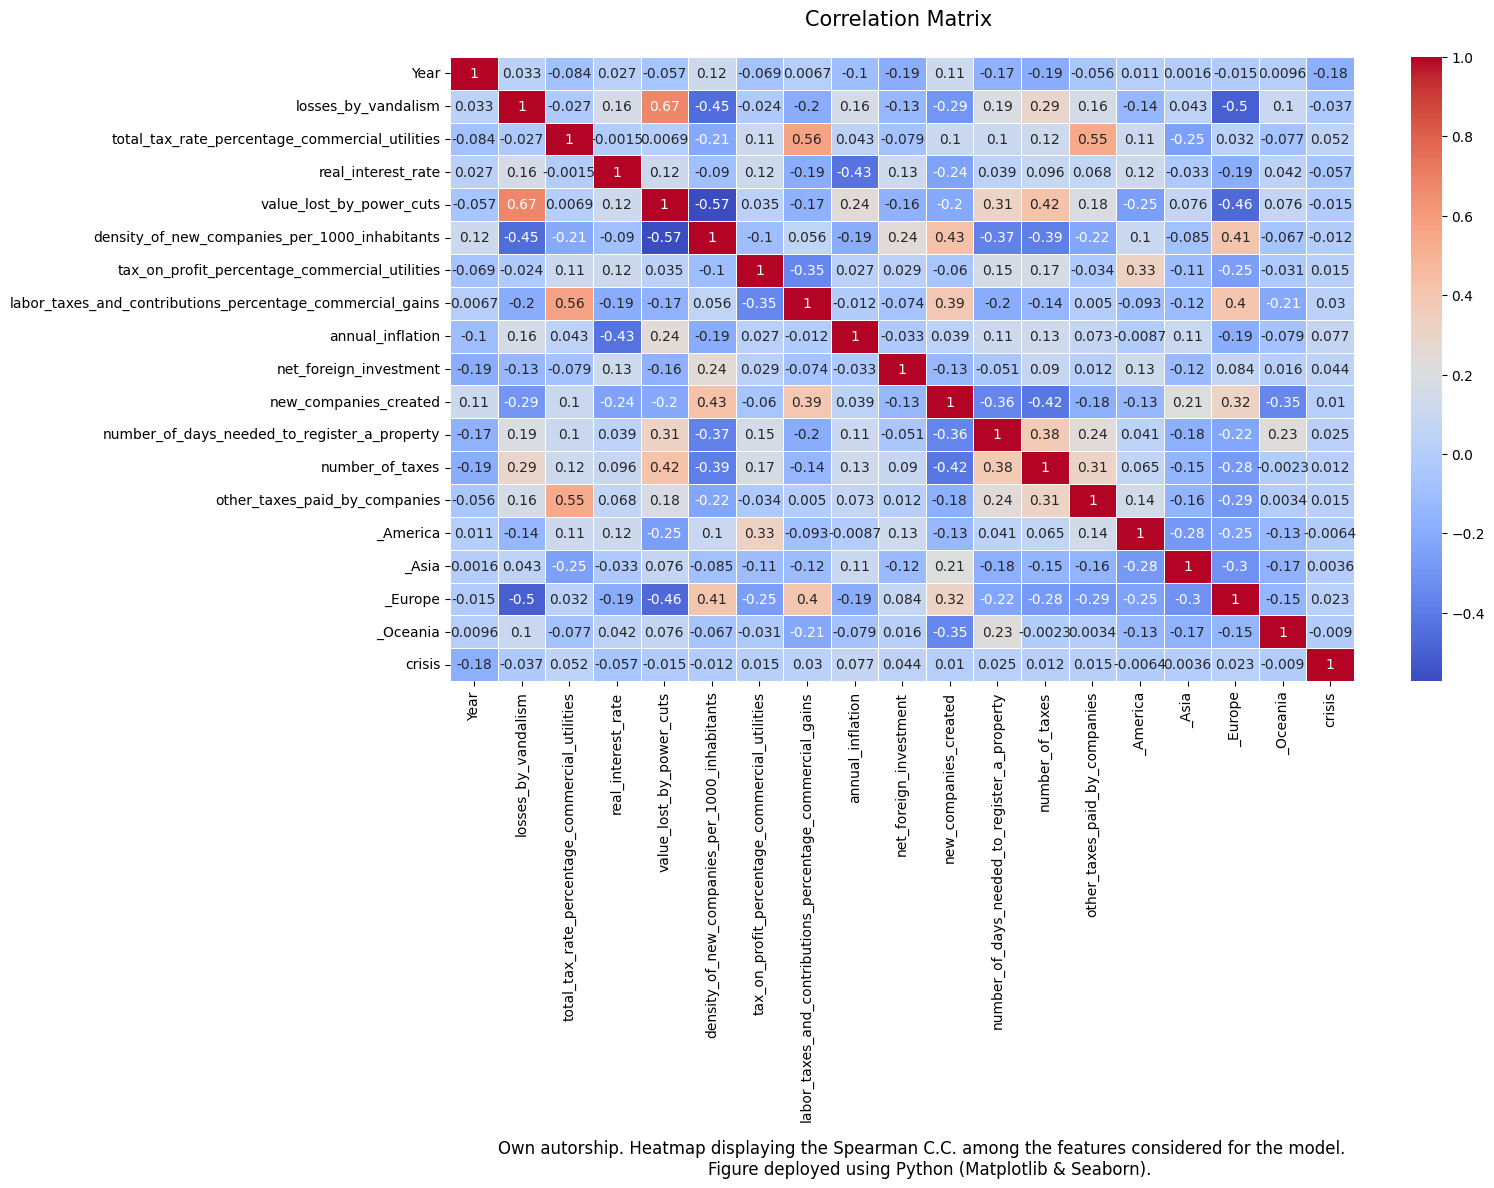

In [534]:
# Creating a df without the Country Name column
df_num = df.drop(columns='Country Name')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 18))
correlation_matrix = df_num.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix \n', fontsize=15)
plt.text(1, 34, 'Own autorship. Heatmap displaying the Spearman C.C. among the features considered for the model. \n' \
                '                                        Figure deployed using Python (Matplotlib & Seaborn).', fontsize=12)
plt.tight_layout()
plt.show()

In [530]:
# Calculate the correlation of each feature with the target variables
target_variables = ['density_of_new_companies_per_1000_inhabitants']

for target_variable in target_variables:
    correlation_with_target = df_num.corr(method='spearman')[target_variable].sort_values(ascending=False)
    print(f"Correlation of each feature with the target variable ({target_variable}):")
    print(correlation_with_target)
    print("\n")

Correlation of each feature with the target variable (density_of_new_companies_per_1000_inhabitants):
density_of_new_companies_per_1000_inhabitants                1.000000
new_companies_created                                        0.427647
_Europe                                                      0.409624
net_foreign_investment                                       0.238843
Year                                                         0.120555
_America                                                     0.101075
labor_taxes_and_contributions_percentage_commercial_gains    0.056204
crisis                                                      -0.011605
_Oceania                                                    -0.067397
_Asia                                                       -0.085462
real_interest_rate                                          -0.089892
tax_on_profit_percentage_commercial_utilities               -0.103733
annual_inflation                                          

3.2. Fitting a XGB Regression Model

In [531]:
df.columns

Index(['Year', 'Country Name', 'losses_by_vandalism',
       'total_tax_rate_percentage_commercial_utilities', 'real_interest_rate',
       'value_lost_by_power_cuts',
       'density_of_new_companies_per_1000_inhabitants',
       'tax_on_profit_percentage_commercial_utilities',
       'labor_taxes_and_contributions_percentage_commercial_gains',
       'annual_inflation', 'net_foreign_investment', 'new_companies_created',
       'number_of_days_needed_to_register_a_property', 'number_of_taxes',
       'other_taxes_paid_by_companies', '_America', '_Asia', '_Europe',
       '_Oceania', 'crisis'],
      dtype='object')

In [532]:
#Defining X and y
y = df[['density_of_new_companies_per_1000_inhabitants']]

X = df[[
    'Year',
    'losses_by_vandalism',
    'total_tax_rate_percentage_commercial_utilities',
    'value_lost_by_power_cuts',
    'annual_inflation',
    'net_foreign_investment',
    'number_of_days_needed_to_register_a_property',
    'number_of_taxes',
    'other_taxes_paid_by_companies',
    'crisis',
    '_America', '_Asia', '_Europe', '_Oceania'
]]

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [542]:
parameters = {
    # Core Tree Structure
    'max_depth': 6,                 # Range: 3-10 (typical)
    'max_leaves': 0,                # Alternative to max_depth (0=disabled)
    'min_child_weight': 3,          # Range: 1-10 (higher=more conservative)
    'gamma': 0,                     # Range: 0-5 (minimum loss reduction to split)
    
    # Learning Process
    'learning_rate': 0.1,           # Range: 0.01-0.3 (eta)
    'n_estimators': 5000,           # Use with early_stopping_rounds
    'booster': 'gbtree',            # 'gbtree', 'gblinear', or 'dart'
    
    # Regularization
    'reg_alpha': 1,                 # L1 (Range: 0-10)
    'reg_lambda': 0,                # L2 (Range: 0-10)
    'max_delta_step': 0,            # Useful for imbalanced regression
    
    # Sampling
    'subsample': 1,                 # Range: 0.6-1.0 (per tree row sampling)
    'colsample_bytree': 1,          # Range: 0.6-1.0 (per tree column sampling)
    'colsample_bylevel': 1,         # Per-level column sampling
    'colsample_bynode': 1,          # Per-split column sampling
    
    # Advanced
    'grow_policy': 'depthwise',     # 'depthwise' or 'lossguide'
    'tree_method': 'auto',          # 'exact', 'approx', 'hist', 'gpu_hist'
    'objective': 'reg:squarederror',
    'random_state': 42,
    
    # Implementation
    'n_jobs': -1,                   # Use all cores
    'verbosity': 1,                 # 0 (silent) to 3 (debug)
    'enable_categorical': False     # For native categorical support
}

model = xgb.XGBRegressor(**parameters)
model.fit(X_train, y_train)

# Predicting the test set
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_percentage_error, max_error, explained_variance_score, median_absolute_error
from scipy.stats import pearsonr, spearmanr

# Existing metrics
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R² Score:', r2_score(y_test, y_pred))

# Additional important metrics
print('\n=== Additional Metrics ===')
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(y_test, y_pred))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Maximum Residual Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

# Relative metrics
print('\n=== Relative Metrics ===')
print('Relative MAE:', mean_absolute_error(y_test, y_pred)/np.mean(y_test))
print('Relative RMSE:', np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y_test))

Mean Absolute Error (MAE): 0.3714574506943693
Mean Squared Error (MSE): 0.3791457029184112
Root Mean Squared Error (RMSE): 0.6157480839746163
R² Score: 0.9206379861550921

=== Additional Metrics ===
Mean Absolute Percentage Error (MAPE): 0.6483895837468311
Median Absolute Error: 0.20509098961352512
Maximum Residual Error: 3.3921458998245946
Explained Variance Score: 0.9208026356174714

=== Relative Metrics ===
Relative MAE: 0.18001480334157413
Relative RMSE: 0.29840233393472176


<Figure size 1400x800 with 0 Axes>

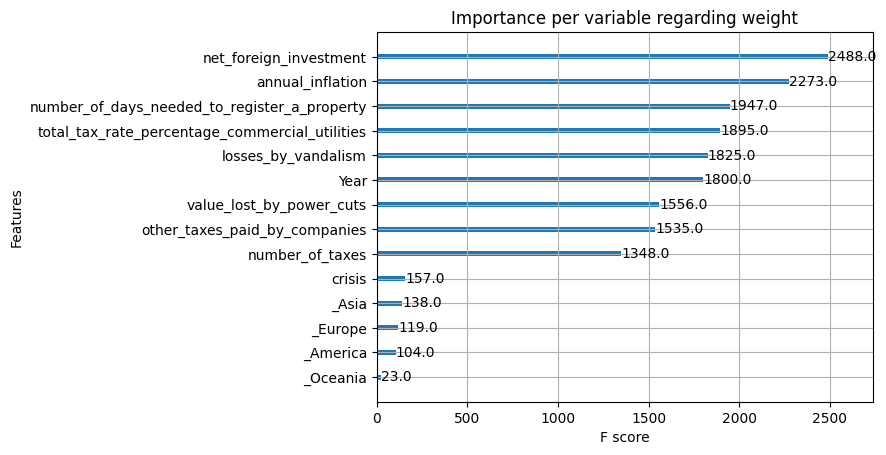

<Figure size 1400x800 with 0 Axes>

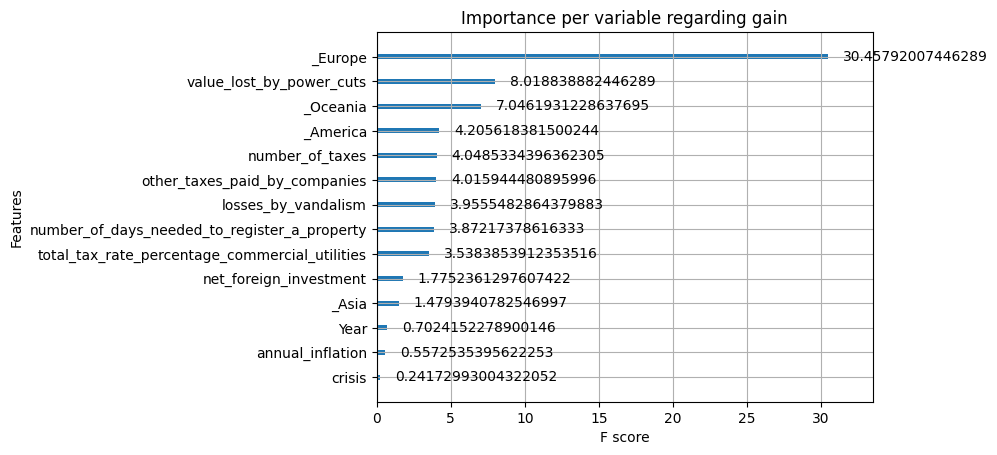

<Figure size 1400x800 with 0 Axes>

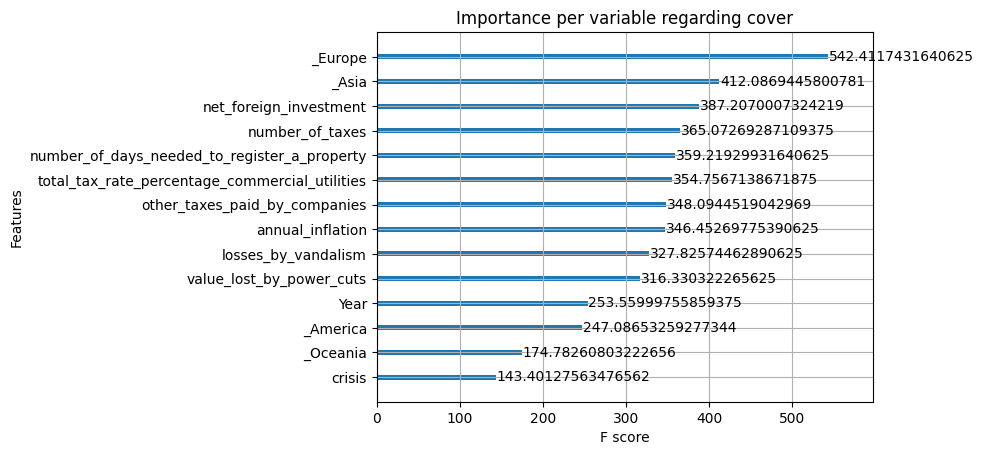

<Figure size 1400x800 with 0 Axes>

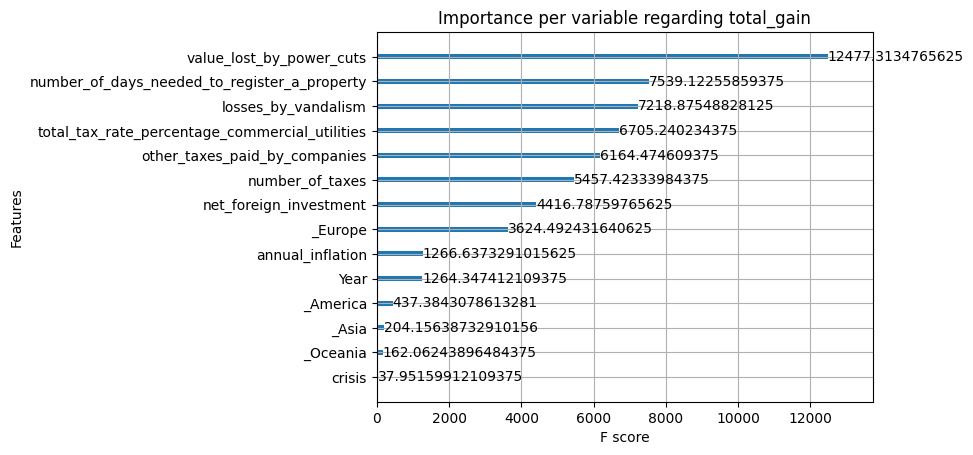

<Figure size 1400x800 with 0 Axes>

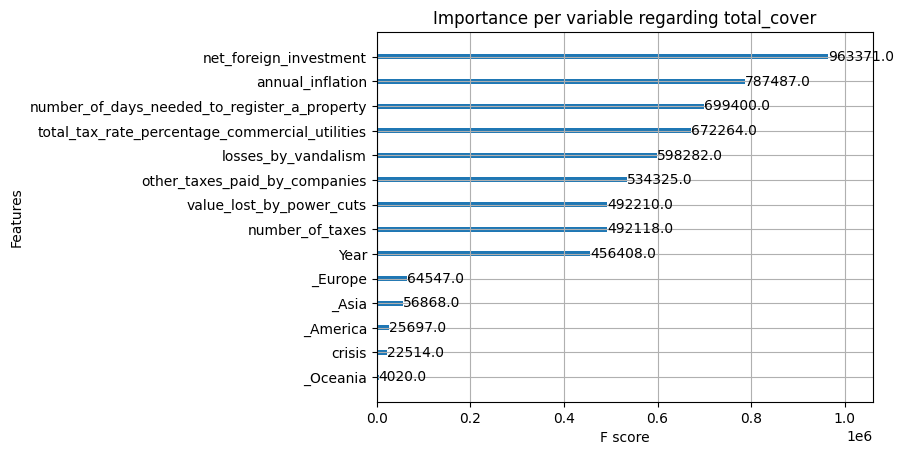

In [424]:
#Visualizing the importance of the variables
type = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
for t in type:
    plt.figure(figsize=(14,8))
    xgb.plot_importance(model, importance_type=t)
    plt.title(f'Importance per variable regarding {t}')
    plt.show()

3.2.1. Analyzing the model using shap

In [425]:
import shap
import numpy as np

shap.initjs()

# Create explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values (assuming X_test is your data)
shap_values = explainer(X_test)

np.shape(shap_values.values)

(614, 14)

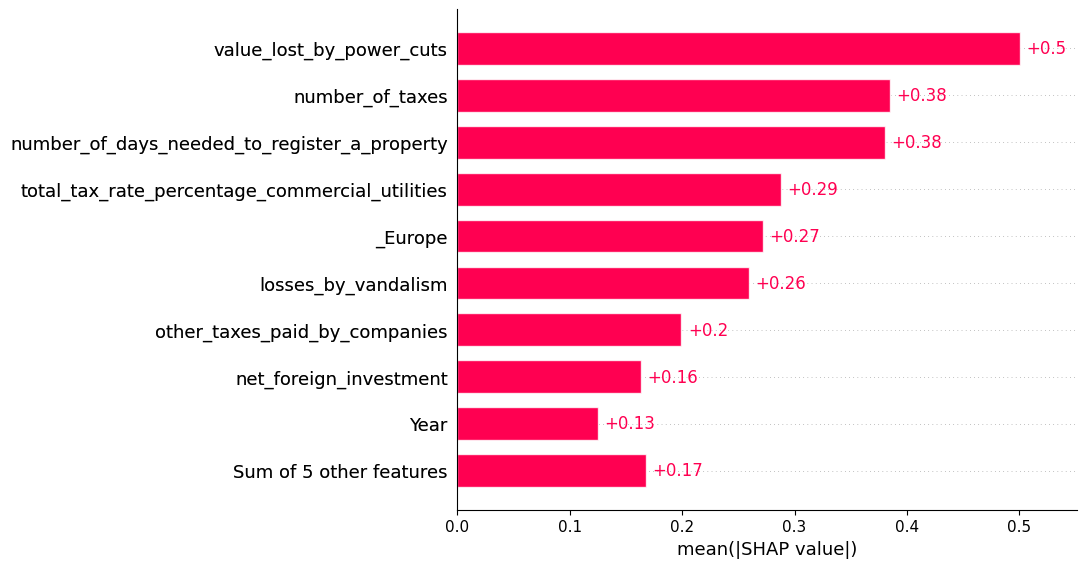

In [426]:
shap.plots.bar(shap_values)

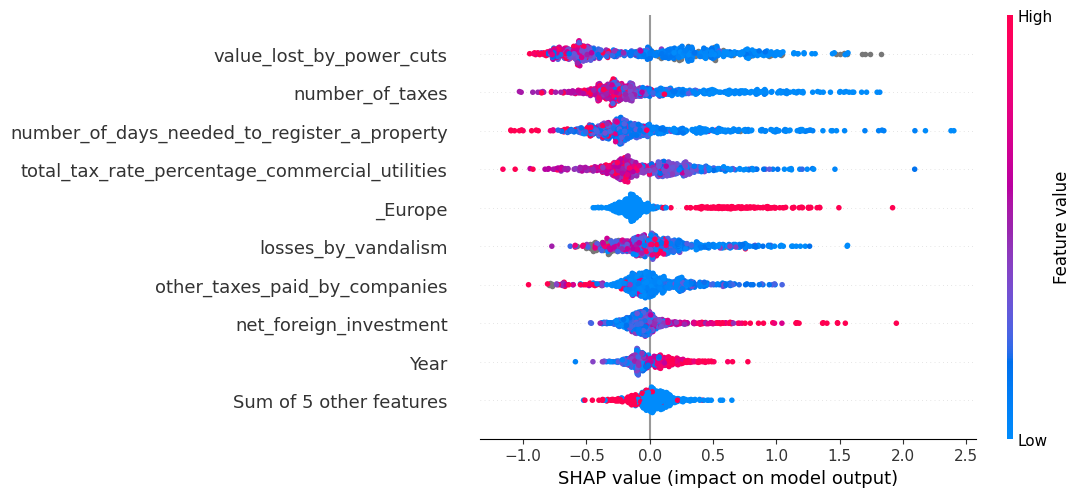

In [427]:
shap.plots.beeswarm(shap_values)

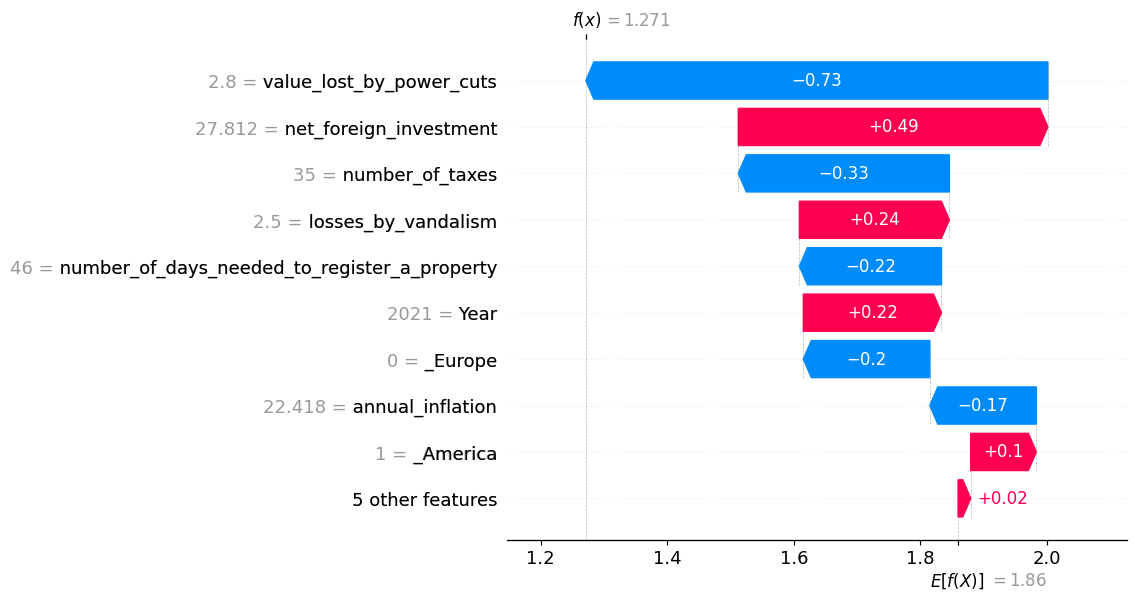

In [428]:
shap.plots.waterfall(shap_values[0])

C:\Users\usuario\AppData\Local\Temp\ipykernel_17624\1629505516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Year'] = X['Year'].astype('int')


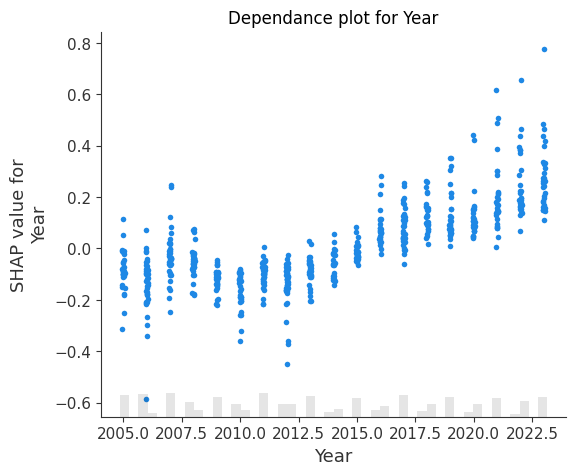

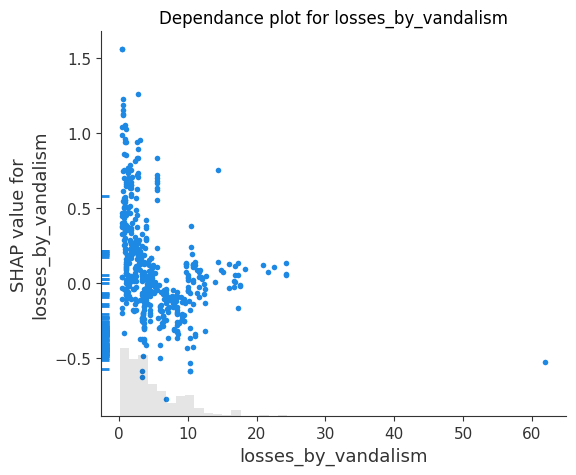

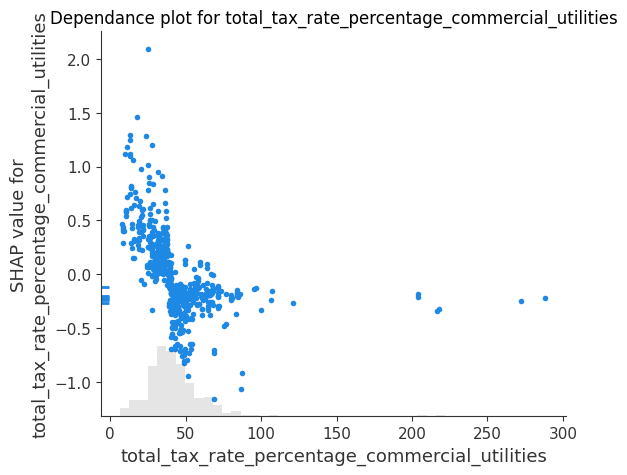

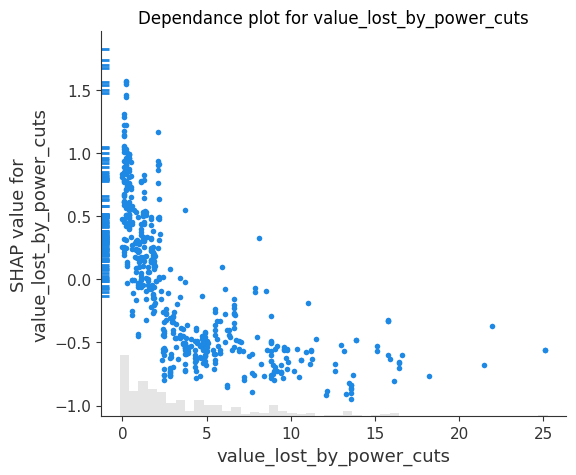

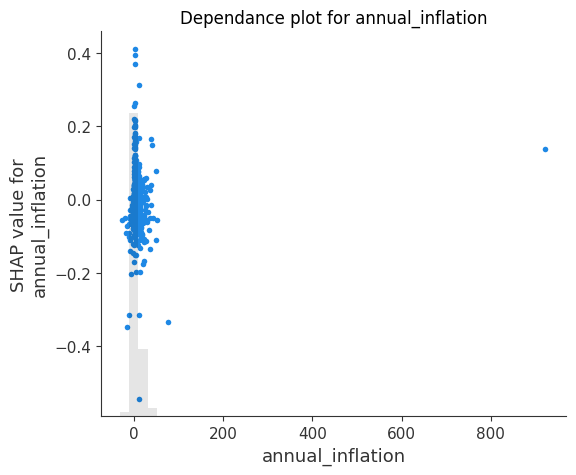

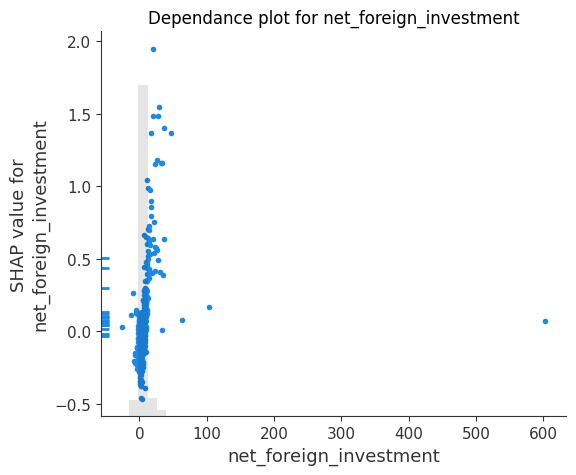

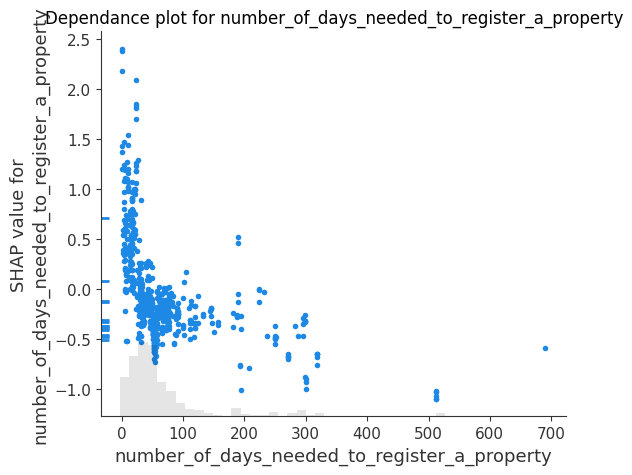

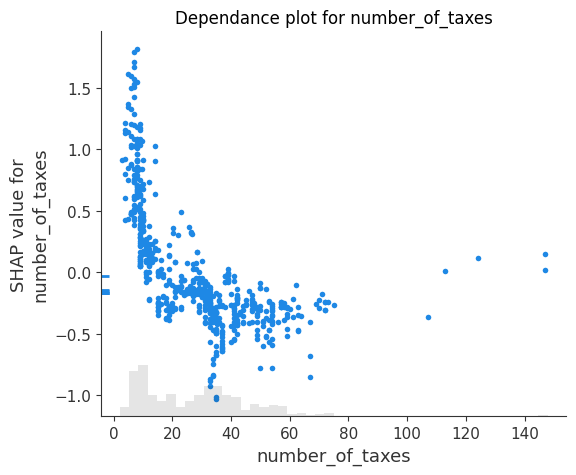

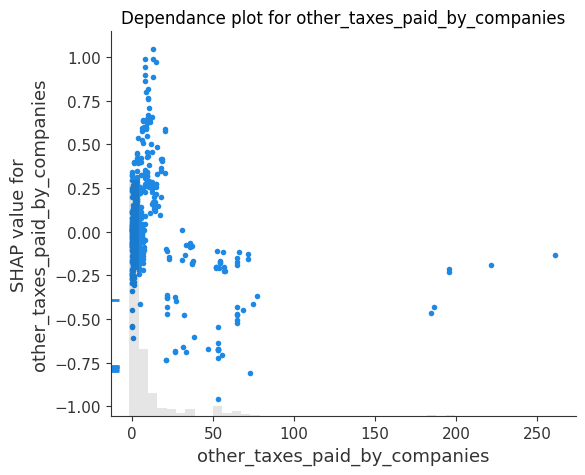

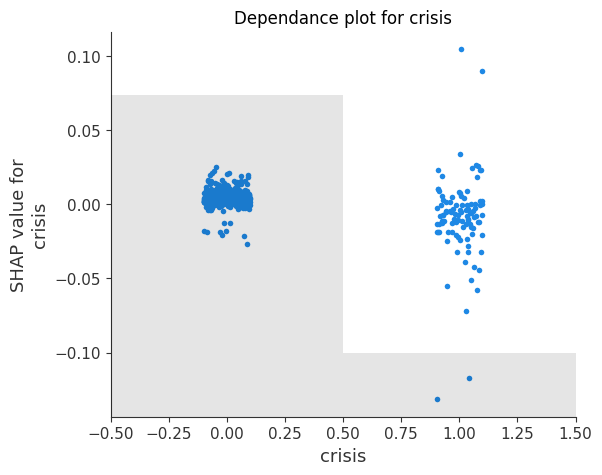

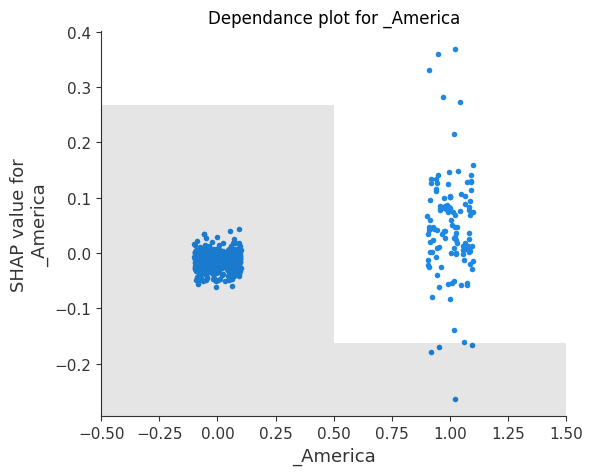

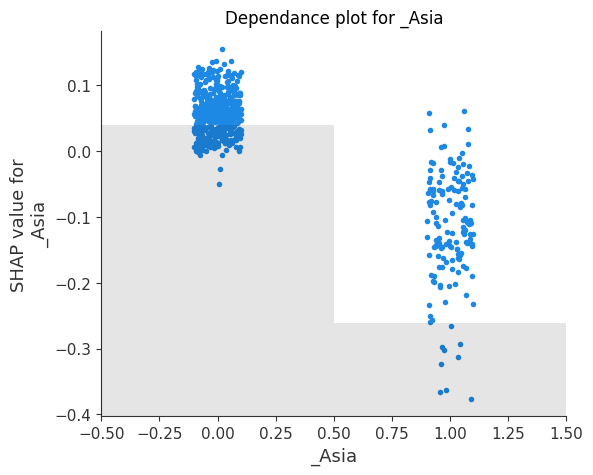

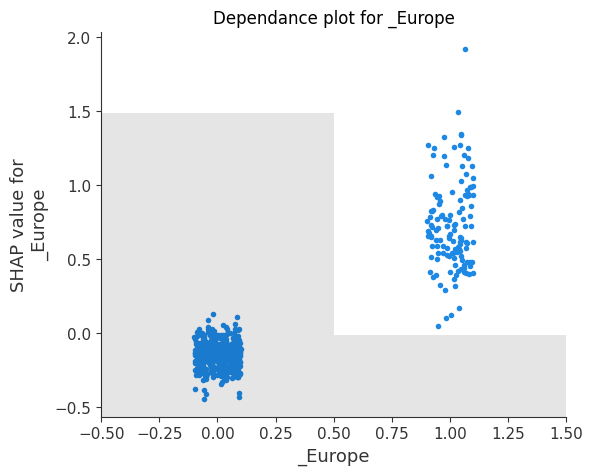

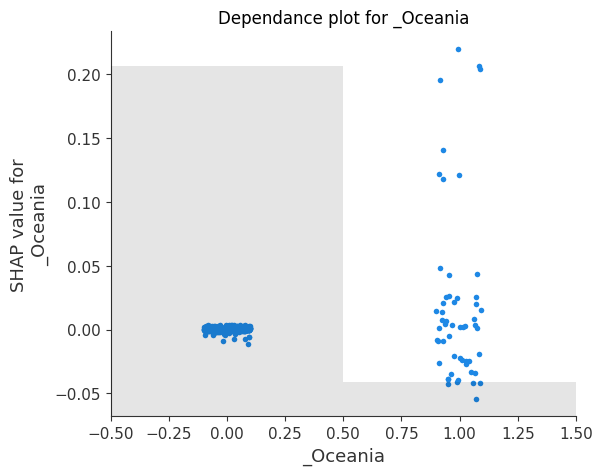

In [429]:
#Dependance Plot

X['Year'] = X['Year'].astype('int')

for var in X.columns.tolist():
    shap.plots.scatter(shap_values[:, var], show=False)
    plt.title(f'Dependance plot for {var}')
    plt.show()